7.1  Create a crawler using the webcrawler provided and discussed in my jupyter notebook ( https://github.com/pschragger/big-data-python-class/blob/master/Lectures/Lecture_7_-_Link_Analysis.ipynb) , have it crawl the first 200 pages from a base URL of your choosing

7.2  Create a Stochastic matrix from its resulting crawling as per https://cs7083.wordpress.com/2013/01/31/demystifying-the-pagerank-and-hits-algorithms/

7.3 Pass it through the Page Rank algorithm and provide the list of the top 5 page URLs in your sample

7.x For extra credit use the hits algorithm ( with a connectivity matrix )

7.xx For advanced credit find another ranking alogrithm and demonstrate that as well

## 7.1 Create a crawler

Here I am crawling the Villanova website for urls.

In [31]:
import requests
from scrapy.http import TextResponse

r = requests.get('http://www1.villanova.edu/main.html')
response = TextResponse(r.url, body=r.text, encoding='utf-8')

In [32]:
print response

<200 http://www1.villanova.edu/main.html>


In [33]:
#Using xpath to access data
response.xpath('//title')

[<Selector xpath='//title' data=u'<title>Villanova University</title>'>]

In [34]:
 response.xpath('//title/text()').extract()

[u'Villanova University']

In [35]:
response.xpath('//ul/li')

[<Selector xpath='//ul/li' data=u'<li><a href="http://www.forthegreatergre'>,
 <Selector xpath='//ul/li' data=u'<li><a href="/content/main/admissions.ht'>,
 <Selector xpath='//ul/li' data=u'<li><a href="https://secure.touchnet.com'>,
 <Selector xpath='//ul/li' data=u'<li><a href="https://novanet.villanova.e'>,
 <Selector xpath='//ul/li' data=u'<li><a href="http://webmail.villanova.ed'>,
 <Selector xpath='//ul/li' data=u'<li><a href="http://elearning.villanova.'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" class'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" oncli'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" oncli'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" class'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" class'>,
 <Selector xpath='//ul/li' data=u'<li>\n\t\t\t\t\t\t\t\t<button type="button" class'>,
 <Selector

In [36]:
import pandas as pd
#response.xpath('//ul/li/a/@href').extract()
df1= pd.DataFrame(response.xpath('//ul/li/a/@href').extract())
print df1

                                                    0
0                  http://www.forthegreatergreat.com/
1                       /content/main/admissions.html
2   https://secure.touchnet.com/C21740_ustores/web...
3                      https://novanet.villanova.edu/
4                       http://webmail.villanova.edu/
5                     http://elearning.villanova.edu/
6                               /main/admissions.html
7   https://secure.touchnet.com/C21740_ustores/web...
8                       http://webmail.villanova.edu/
9                     http://elearning.villanova.edu/
10                           /content/main/about.html
11                      /content/main/admissions.html
12                     /content/main/vuacademics.html
13                       http://library.villanova.edu
14                        /content/main/oncampus.html
15                           http://www.villanova.com
16                   /content/main/vuadvancement.html
17                          

Since this website did not give back a huge list of urls, I decided to explore a sample of 9 Urls from this output. Therefore I will have a network of 10 urls to work with. These include: 

https://novanet.villanova.edu/

http://webmail.villanova.edu/

http://library.villanova.edu/

https://www.facebook.com/VillanovaU

https://www.twitter.com/VillanovaU

http://www.youtube.com/user/villanovauniversity

http://www.linkedin.com/edu/school?id=19339

http://www.instagram.com/villanovau

http://www.villanova.com/

For each of these links, I will find the urls and construct a Network to perform the analysis on.


In [12]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r2 = requests.get('https://novanet.villanova.edu/')
response2 = TextResponse(r2.url, body=r2.text, encoding='utf-8')
df2= pd.DataFrame(response2.xpath('//ul/li/a/@href').extract())
print df2

Empty DataFrame
Columns: []
Index: []


In [13]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r3 = requests.get('http://webmail.villanova.edu/')
response3 = TextResponse(r3.url, body=r3.text, encoding='utf-8')
df3= pd.DataFrame(response3.xpath('//ul/li/a/@href').extract())
print df3

                                              0
0           //www1.villanova.edu/villanova.html
1          //www1.villanova.edu/main/about.html
2     //www1.villanova.edu/main/admissions.html
3    //www1.villanova.edu/main/vuacademics.html
4                  http://library.villanova.edu
5       //www1.villanova.edu/main/oncampus.html
6                      http://www.villanova.com
7  //www1.villanova.edu/main/vuadvancement.html
8                  http://novanet.villanova.edu


In [15]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r4 = requests.get('http://library.villanova.edu/')
response4 = TextResponse(r4.url, body=r4.text, encoding='utf-8')
df4= pd.DataFrame(response4.xpath('//ul/li/a/@href').extract())
print df4

                                                    0
0                   http://blog.library.villanova.edu
1                                 /about/information/
2                                    /about/services/
3                                 /about/departments/
4                                    /about/projects/
5                          /about/falvey-quick-facts/
6                                /about/social-media/
7                                    /about/contactus
8                               /Find/MyResearch/Home
9   http://universitypublications.villanova.edu/mo...
10  https://library.villanova.edu/about/projects/f...
11  https://exhibits.library.villanova.edu/wildcat...
12  https://1842day.villanova.edu/campaigns/falvey...
13  https://library.villanova.edu/about/projects/f...
14                                          /research
15                                /research/databases
16                                /research/ejournals
17                          

In [23]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r5 = requests.get('https://www.facebook.com/VillanovaU')
response5 = TextResponse(r5.url, body=r5.text, encoding='utf-8')
df5= pd.DataFrame(response5.xpath('//ul/li/a/@href').extract())
print df5

                                                   0
0  https://www.facebook.com/search/10729957263358...


In [24]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r6 = requests.get('https://www.twitter.com/VillanovaU')
response6 = TextResponse(r6.url, body=r6.text, encoding='utf-8')
df6= pd.DataFrame(response6.xpath('//ul/li/a/@href').extract())
print df6

                                          0
0                                         /
1                                /i/moments
2                                          
3                                          
4                                          
5                                          
6                      #supported_languages
7                                  ?lang=id
8                                 ?lang=msa
9                                  ?lang=ca
10                                 ?lang=cs
11                                 ?lang=da
12                                 ?lang=de
13                              ?lang=en-gb
14                                 ?lang=es
15                                ?lang=fil
16                                 ?lang=fr
17                                 ?lang=hr
18                                 ?lang=it
19                                 ?lang=hu
20                                 ?lang=nl
21                              

In [25]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r7 = requests.get('http://www.youtube.com/user/villanovauniversity')
response7 = TextResponse(r7.url, body=r7.text, encoding='utf-8')
df7= pd.DataFrame(response7.xpath('//ul/li/a/@href').extract())
print df7

                                                    0
0   /user/villanovauniversity/videos?disable_polym...
1   /user/villanovauniversity/playlists?disable_po...
2   /user/villanovauniversity/channels?disable_pol...
3   /user/villanovauniversity/about?disable_polymer=1
4                                                   /
5                                      /feed/trending
6                                       /feed/history
7                                                /red
8   https://tv.youtube.com/?utm_source=youtube_web...
9                   /channel/UC-9-kyTW8ZkZNDHQJ6FgpwQ
10                  /channel/UCEgdi0XIXXZ-qJOFPf4JSKw
11                  /channel/UCOpNcN46UbXVtpKMrmU4Abg
12                  /channel/UClgRkhTL3_hImCAmdLfDE4g
13                  /channel/UCl8dMTqDrJQ0c8y23UBu4kQ
14                  /channel/UCYfdidRxbB8Qhf0Nx7ioOYw
15                  /channel/UC4R8DWoMoI7CAwX8_LjQHig
16                  /channel/UCBR8-60-B28hp2BmDPdntcQ
17                  /channel

In [29]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r8 = requests.get('http://www.linkedin.com/edu/school?id=19339')
response8 = TextResponse(r8.url, body=r8.text, encoding='utf-8')
df8= pd.DataFrame(response8.xpath('//ul/li/a/@href').extract())
print df8

Empty DataFrame
Columns: []
Index: []


In [37]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r9 = requests.get('http://www.instagram.com/villanovau')
response9 = TextResponse(r9.url, body=r9.text, encoding='utf-8')
df9= pd.DataFrame(response9.xpath('//ul/li/a/@href').extract())
print df9

Empty DataFrame
Columns: []
Index: []


In [48]:
import requests
from scrapy.http import TextResponse
import pandas as pd

r10 = requests.get('http://www.villanova.com/')
response10 = TextResponse(r10.url, body=r10.text, encoding='utf-8')
df10= pd.DataFrame(response10.xpath('//ul/li/a/@href').extract())
print df10

                                                    0
0                http://www.twitter.com/Novaathletics
1         https://www.facebook.com/VillanovaAthletics
2                http://www.youtube.com/Novaathletics
3                  http://instagram.com/novaathletics
4         http://www.villanova.com/collegesportslive/
5   http://tunein.com/radio/Villanova-Sports-Netwo...
6                                                   #
7                  https://twitter.com/hashtag/gonova
8                                                   #
9                                                   #
10                         /tickets/tickets-home.html
11  http://ev8.evenue.net/cgi-bin/ncommerce3/SEGet...
12                          /tickets/ticketterms.html
13                   /tickets/ticketdistribution.html
14                     /tickets/football-tickets.html
15                     /tickets/m-baskbl-tickets.html
16                     /tickets/w-baskbl-tickets.html
17                     /tick

Now for all the links, I know how many incoming and outcoming links they have. I can now construct a network.

## 7.2 Create a stochastic matrix

Before creating a stochastic matrix, I wanted to create a visual of the network. Here are the websites indexes, which will help simplfy:

1: http://www1.villanova.edu/main.html

2: https://novanet.villanova.edu/

3: http://webmail.villanova.edu/

4: http://library.villanova.edu/

5: https://www.facebook.com/VillanovaU

6: https://www.twitter.com/VillanovaU

7: http://www.youtube.com/user/villanovauniversity

8: http://www.linkedin.com/edu/school?id=19339

9: http://www.instagram.com/villanovau

10: http://www.villanova.com/

A connectivity matrix is really needed to create the stochastic matrix, so I constructed the connectivity matrix. I will later use this matrix for the hits algorithm. The connectivity matrix has rows i and columns j. There is a 1 if there is a link out of i into j, else a 0:

[0,1,1,1,1,1,1,1,1,1]

[0,0,0,0,0,0,0,0,0,0]

[1,1,0,1,0,0,0,0,0,1]

[0,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[1,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[1,0,0,0,0,0,0,0,0,0]


To create the visulization of the network, I utilized networkx. I got help from the following links:

https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python

https://networkx.github.io/documentation/networkx-1.10/index.html


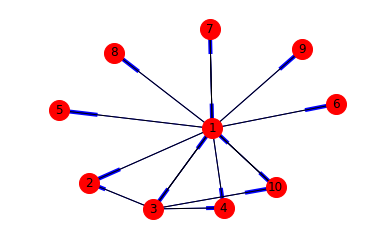

In [85]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_edges_from(
    [('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'),
     ('1', '7'), ('1', '8'), ('1', '9'), ('1', '10'),('3','1'),
     ('3','2'), ('3','4'),('3','10'),('7','1'),('10','1')])



# Specify the edges you want here


# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 400)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='blue', arrows=True)
nx.draw_networkx_edges(G, pos, arrows=False)
limits=plt.axis('off')
plt.show()

The blue bars indicate an arrow. For example, all nodes have a blue bar on the edge coming from 1. This means that that node has an incoming link from 1. Since 5 has no outgoing links, it only has one incoming link from 1.

Now I have my network, I can construct the stochastic matrix. Each entry in the stochastic matrix, is the number of incoming links from i to j divided by the total number of links out of i. Which is essentially the probability that one of the edges out of i will be the incoming link to j.

My Stochastic matrix is:

[0, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[1/4, 1/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [90]:
from numpy import *
stochMatrix= array([[0, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1./4, 1./4, 0, 1./4, 0, 0, 0, 0, 0, 1./4],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]] )
print stochMatrix

[[ 0.          0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
   0.11111111  0.11111111  0.11111111  0.11111111]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.25        0.25        0.          0.25        0.          0.          0.
   0.          0.          0.25      ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.   

## 7.3 Pass the matrix through pagerank and list top 5 urls

Now I am using the pagerank code given in the lecture. I am passing in my stochastic matrix and analyzing the output.

In [95]:
from numpy import *
 
def pagerank(H):
    n= len(H)
    w = zeros(n)
    rho = 1./n * ones(n);
    for i in range(n):
        if multiply.reduce(H[i]== zeros(n)):
            w[i] = 1
    newH = H + outer((1./n * w),ones(n))
 
    theta=0.85
    G = (theta * newH) + ((1-theta) * outer(1./n * ones(n), ones(n)))
    print rho
    for j in range(10):
        rho = dot(rho,G)
        print rho

In [93]:
pagerank(stochMatrix)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
[ 0.25725     0.09669444  0.07544444  0.09669444  0.07544444  0.07544444
  0.07544444  0.07544444  0.07544444  0.09669444]
[ 0.21943917  0.09741694  0.081385    0.09741694  0.081385    0.081385
  0.081385    0.081385    0.081385    0.09741694]
[ 0.22850775  0.0972509   0.07995659  0.0972509   0.07995659  0.07995659
  0.07995659  0.07995659  0.07995659  0.0972509 ]
[ 0.22633504  0.09728996  0.08029918  0.09728996  0.08029918  0.08029918
  0.08029918  0.08029918  0.08029918  0.09728996]
[ 0.22685536  0.09728068  0.0802171   0.09728068  0.0802171   0.0802171
  0.0802171   0.0802171   0.0802171   0.09728068]
[ 0.22673078  0.09728289  0.08023676  0.09728289  0.08023676  0.08023676
  0.08023676  0.08023676  0.08023676  0.09728289]
[ 0.2267606   0.09728236  0.08023205  0.09728236  0.08023205  0.08023205
  0.08023205  0.08023205  0.08023205  0.09728236]
[ 0.22675346  0.09728249  0.08023318  0.09728249  0.08023318  0.08023318
  0.08023318  0.0

From out pagerank output, we can see that the highest rated links. 

The highest link is link 1 with a rank of .2267

Tied for 2 are three links: 2,4, and 10 with a rating of .09728

The 4th and 5th are also ties between 3, 5, 6, 7, 8, and 9 with a rating of .08023

So in order by rank we have:

1: http://www1.villanova.edu/main.html

2: https://novanet.villanova.edu/

3: http://library.villanova.edu/

4: http://www.villanova.com/ 

5: http://webmail.villanova.edu/

6: https://www.facebook.com/VillanovaU

7: https://www.twitter.com/VillanovaU

8: http://www.youtube.com/user/villanovauniversity

9: http://www.linkedin.com/edu/school?id=19339

10: http://www.instagram.com/villanovau

We can make sense of this list by looking at the connectivity matrix. Since 1 has the most outgoing and incoming links, it has the highest rating. Links 2, 4 and 10 have the second highest number of incoming links which is why they are tied for second place.

This assignment helped me to get a strong grasp of how link analysis is done. Although I only did a small sample, I can see the steps and process that would go into doing this large scale.


## 7.x For extra credit use the hits algorithm

In [102]:
def hits(A):
    n= len(A)
    Au= dot(transpose(A),A)
    Hu = dot(A,transpose(A))
    a = ones(n); h = ones(n)
    print a,h
    for j in range(9):
        a = dot(a,Au)
        a= a/sum(a)
        h = dot(h,Hu)
        h = h/ sum(h)
        print a,h

In [103]:
conMatrix = array([[0,1,1,1,1,1,1,1,1,1],
[0,0,0,0,0,0,0,0,0,0],
[1,1,0,1,0,0,0,0,0,1],
[0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0]])
hits(conMatrix)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.06060606  0.13131313  0.09090909  0.13131313  0.09090909  0.09090909
  0.09090909  0.09090909  0.09090909  0.13131313] [ 0.44444444  0.          0.33333333  0.          0.          0.
  0.11111111  0.          0.          0.11111111]
[ 0.05539359  0.13411079  0.09037901  0.13411079  0.09037901  0.09037901
  0.09037901  0.09037901  0.09037901  0.13411079] [ 0.55555556  0.          0.32098765  0.          0.          0.          0.0617284
  0.          0.          0.0617284 ]
[ 0.05443886  0.13428252  0.09045226  0.13428252  0.09045226  0.09045226
  0.09045226  0.09045226  0.09045226  0.13428252] [ 0.60074627  0.          0.30970149  0.          0.          0.
  0.04477612  0.          0.          0.04477612]
[ 0.05418838  0.13426854  0.090501    0.13426854  0.090501    0.090501
  0.090501    0.090501    0.090501    0.13426854] [ 0.6172301   0.          0.30498001  0.          0.          0.
  0.03889

We can see from the final two arrays output from our hits algorithm, the highest rated hubs and authorities. 

First lets look at the hubs:

[ 0.62603318  0.          0.30236415  0.          0.          0.   0.03580134  0.          0.          0.03580134]

The hits algorithm works based on the connectivity matrix. Since 1 has the most outgoing links, it makes sense that it is the highest rated hub. Similrly 3 has the second highest number of outgoing links which would make sense why it is the second highest rated hub. Lastly 10 and 7 are our third highest hubs.

List of hubs based on ratings:

1: http://www1.villanova.edu/main.html

2: http://webmail.villanova.edu/

3: http://www.youtube.com/user/villanovauniversity

4: http://www.villanova.com/

5: https://novanet.villanova.edu/

6: http://library.villanova.edu/

7: https://www.facebook.com/VillanovaU

8: https://www.twitter.com/VillanovaU

9: http://www.linkedin.com/edu/school?id=19339

10: http://www.instagram.com/villanovau


Now lets look at authorities:

[ 0.05406971  0.13425006  0.09053002  0.13425006  0.09053002  0.09053002  0.09053002  0.09053002  0.09053002  0.13425006]

Authorites are based on the number of incoming links and if they are from highly rated hubs. All nodes have incoming links from 1. However, others have incoming links from others. Since 2, 4, and 10 have incoming links from 1 and 3, which are highly rated hubs, they are the highest rated authorites.

List of authorities based on ratings:

1: https://novanet.villanova.edu/

2: http://library.villanova.edu/

3: http://www.villanova.com/

4: http://webmail.villanova.edu/

5: https://www.facebook.com/VillanovaU

6: https://www.twitter.com/VillanovaU

7: http://www.youtube.com/user/villanovauniversity

8: http://www.linkedin.com/edu/school?id=19339

9: http://www.instagram.com/villanovau

10: http://www1.villanova.edu/main.html

